In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from functools import partial

# Plot training and validation metrics
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [1]:
from sklearn.metrics import f1_score

# Replace 'y_true' with your true labels and 'y_pred' with your predicted labels
weighted_f1 = f1_score(y_true, y_pred, average='weighted')

NameError: name 'y_true' is not defined

Found 28709 images belonging to 7 classes.


2023-10-13 18:04:47.231146: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-13 18:04:47.231174: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-13 18:04:47.231181: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-13 18:04:47.231211: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-13 18:04:47.231230: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2023-10-13 18:04:47.625605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


256/256 [==============================] - 7s 25ms/step - loss: 6342722.5000 - accuracy: 0.1393 - val_loss: 12.7700 - val_accuracy: 0.1411
Epoch 2/50
256/256 [==============================] - 6s 25ms/step - loss: 12.2634 - accuracy: 0.1726 - val_loss: 20.9928 - val_accuracy: 0.2510
Epoch 3/50
256/256 [==============================] - 6s 24ms/step - loss: 10.6482 - accuracy: 0.1836 - val_loss: 10.2718 - val_accuracy: 0.1418
Epoch 4/50
256/256 [==============================] - 6s 24ms/step - loss: 10.8631 - accuracy: 0.1772 - val_loss: 7.3726 - val_accuracy: 0.2510
Epoch 5/50
256/256 [==============================] - 6s 24ms/step - loss: 10.5310 - accuracy: 0.1730 - val_loss: 6.0160 - val_accuracy: 0.2510
Epoch 6/50
256/256 [==============================] - 6s 24ms/step - loss: 11.2192 - accuracy: 0.1750 - val_loss: 8.0443 - val_accuracy: 0.1418
Epoch 7/50
256/256 [==============================] - 6s 24ms/step - loss: 10.0938 - accuracy: 0.1749 - val_loss: 9.8823 - val_accuracy: 0.

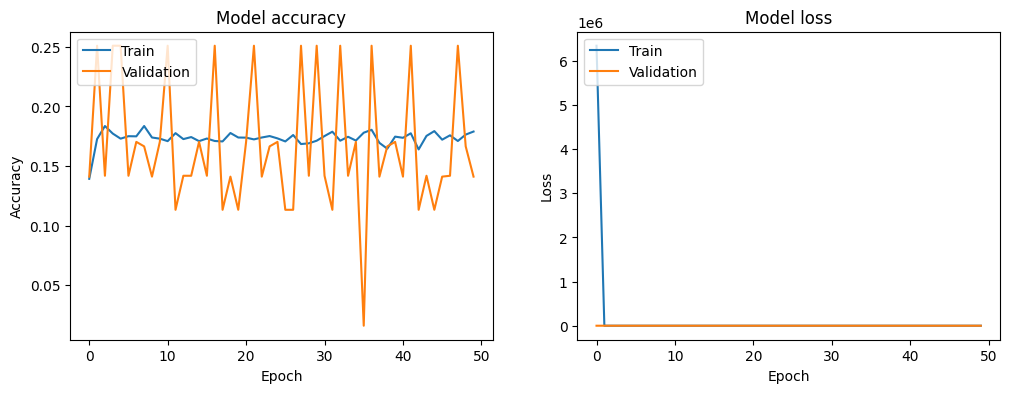

In [2]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=2*np.e**-1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_lr_2e1.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 6s 24ms/step - loss: 64539.2031 - accuracy: 0.1588 - val_loss: 1.8842 - val_accuracy: 0.2488
Epoch 2/50
256/256 [==============================] - 6s 23ms/step - loss: 1.8442 - accuracy: 0.2207 - val_loss: 1.8350 - val_accuracy: 0.2488
Epoch 3/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8564 - accuracy: 0.2185 - val_loss: 1.8296 - val_accuracy: 0.2488
Epoch 4/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8603 - accuracy: 0.2194 - val_loss: 1.8416 - val_accuracy: 0.2488
Epoch 5/50
256/256 [==============================] - 6s 23ms/step - loss: 1.8581 - accuracy: 0.2245 - val_loss: 1.8758 - val_accuracy: 0.2488
Epoch 6/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8732 - accuracy: 0.2152 - val_loss: 1.8913 - val_accuracy: 0.1675
Epoch 7/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8839 - accuracy: 0

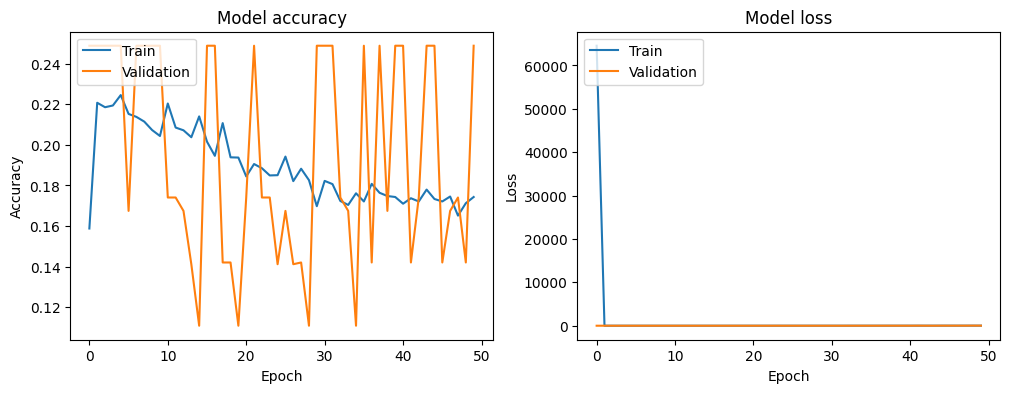

In [3]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=2*np.e**-2), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_lr_2e2.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 6s 24ms/step - loss: 1328.5825 - accuracy: 0.2150 - val_loss: 1.8222 - val_accuracy: 0.2468
Epoch 2/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8490 - accuracy: 0.2194 - val_loss: 1.9708 - val_accuracy: 0.2468
Epoch 3/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8370 - accuracy: 0.2236 - val_loss: 1.8599 - val_accuracy: 0.2468
Epoch 4/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8542 - accuracy: 0.2114 - val_loss: 2.2826 - val_accuracy: 0.1456
Epoch 5/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8614 - accuracy: 0.2163 - val_loss: 1.8337 - val_accuracy: 0.2468
Epoch 6/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8500 - accuracy: 0.2192 - val_loss: 1.8333 - val_accuracy: 0.2468
Epoch 7/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8629 - accuracy: 0.

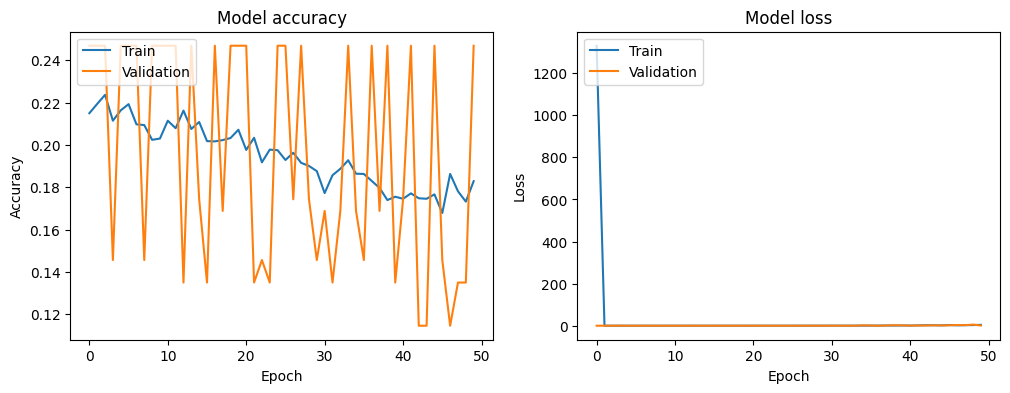

In [4]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=2*np.e**-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_lr_2e3.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 6s 24ms/step - loss: 9.7497 - accuracy: 0.1951 - val_loss: 1.8972 - val_accuracy: 0.1655
Epoch 2/50
256/256 [==============================] - 6s 23ms/step - loss: 1.9236 - accuracy: 0.1982 - val_loss: 1.9288 - val_accuracy: 0.2462
Epoch 3/50
256/256 [==============================] - 6s 23ms/step - loss: 1.8930 - accuracy: 0.2172 - val_loss: 1.8277 - val_accuracy: 0.2462
Epoch 4/50
256/256 [==============================] - 6s 23ms/step - loss: 1.8359 - accuracy: 0.2408 - val_loss: 1.8434 - val_accuracy: 0.2462
Epoch 5/50
256/256 [==============================] - 6s 23ms/step - loss: 1.8455 - accuracy: 0.2319 - val_loss: 1.8775 - val_accuracy: 0.2462
Epoch 6/50
256/256 [==============================] - 5342s 21s/step - loss: 1.8527 - accuracy: 0.2263 - val_loss: 1.8750 - val_accuracy: 0.2462
Epoch 7/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8541 - accuracy: 0.2

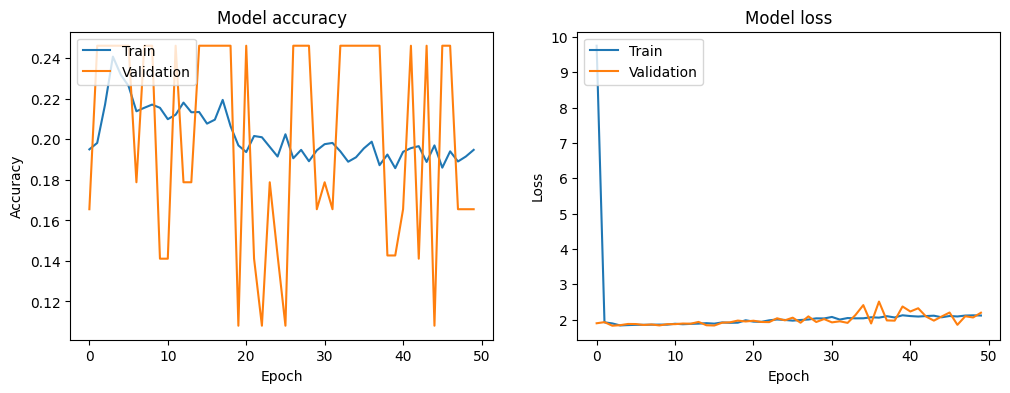

In [5]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=2*np.e**-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_lr_2e4.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 6s 24ms/step - loss: 2.0238 - accuracy: 0.2433 - val_loss: 1.8138 - val_accuracy: 0.2467
Epoch 2/50
256/256 [==============================] - 6s 22ms/step - loss: 1.8307 - accuracy: 0.2515 - val_loss: 1.8276 - val_accuracy: 0.2467
Epoch 3/50
256/256 [==============================] - 6s 23ms/step - loss: 1.8336 - accuracy: 0.2474 - val_loss: 1.8327 - val_accuracy: 0.2467
Epoch 4/50
256/256 [==============================] - 5069s 20s/step - loss: 1.8348 - accuracy: 0.2446 - val_loss: 1.8835 - val_accuracy: 0.2467
Epoch 5/50
256/256 [==============================] - 7s 28ms/step - loss: 1.8418 - accuracy: 0.2316 - val_loss: 1.8141 - val_accuracy: 0.2467
Epoch 6/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8449 - accuracy: 0.2305 - val_loss: 1.8227 - val_accuracy: 0.2467
Epoch 7/50
256/256 [==============================] - 6s 25ms/step - loss: 1.8409 - accuracy: 0.2

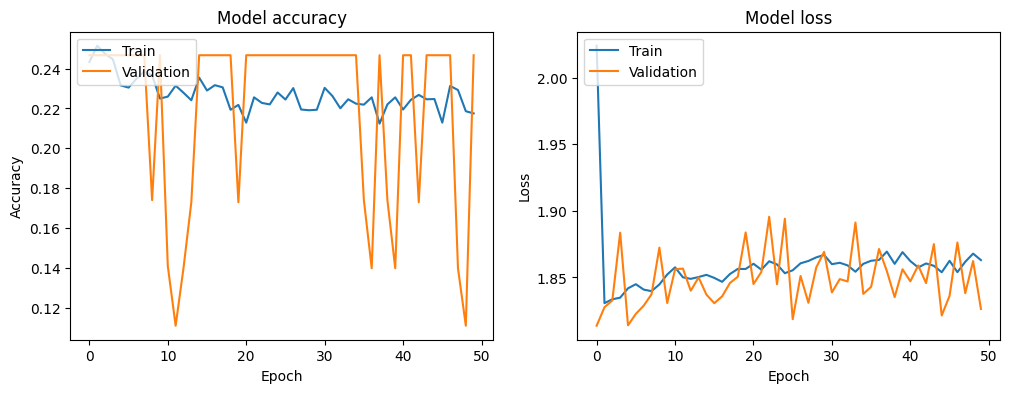

In [6]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=2*np.e**-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_lr_2e5.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8461 - accuracy: 0.2467 - val_loss: 1.8105 - val_accuracy: 0.2544
Epoch 2/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8081 - accuracy: 0.2546 - val_loss: 1.8143 - val_accuracy: 0.2544
Epoch 3/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8081 - accuracy: 0.2546 - val_loss: 1.8169 - val_accuracy: 0.2544
Epoch 4/50
256/256 [==============================] - 6s 23ms/step - loss: 1.8078 - accuracy: 0.2546 - val_loss: 1.8104 - val_accuracy: 0.2544
Epoch 5/50
256/256 [==============================] - 6s 23ms/step - loss: 1.8087 - accuracy: 0.2546 - val_loss: 1.8118 - val_accuracy: 0.2544
Epoch 6/50
256/256 [==============================] - 6s 23ms/step - loss: 1.8089 - accuracy: 0.2546 - val_loss: 1.8159 - val_accuracy: 0.2544
Epoch 7/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8081 - accuracy: 0.254

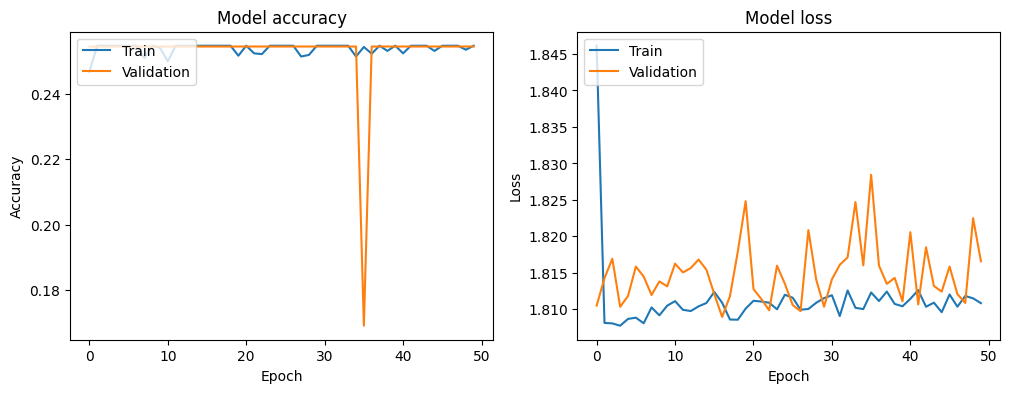

In [7]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=2*np.e**-6), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_lr_2e6.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 7s 26ms/step - loss: 1094.0701 - accuracy: 0.1685 - val_loss: 6.1721 - val_accuracy: 0.1715
Epoch 2/50
256/256 [==============================] - 6s 24ms/step - loss: 21.5762 - accuracy: 0.1769 - val_loss: 26.2676 - val_accuracy: 0.1412
Epoch 3/50
256/256 [==============================] - 6s 24ms/step - loss: 17.4267 - accuracy: 0.1744 - val_loss: 23.2012 - val_accuracy: 0.1715
Epoch 4/50
256/256 [==============================] - 6s 25ms/step - loss: 17.2888 - accuracy: 0.1770 - val_loss: 20.1838 - val_accuracy: 0.1715
Epoch 5/50
256/256 [==============================] - 6s 24ms/step - loss: 19.3809 - accuracy: 0.1630 - val_loss: 10.7243 - val_accuracy: 0.1112
Epoch 6/50
256/256 [==============================] - 6s 25ms/step - loss: 14.9956 - accuracy: 0.1713 - val_loss: 8.0282 - val_accuracy: 0.1691
Epoch 7/50
256/256 [==============================] - 6s 25ms/step - loss: 10.7444 - ac

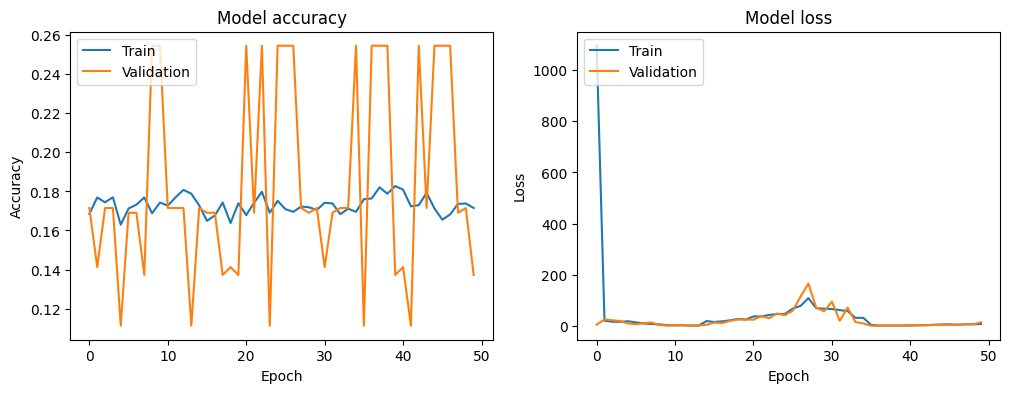

In [8]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_lr_10-1.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 7s 26ms/step - loss: 1.9683 - accuracy: 0.2413 - val_loss: 1.8124 - val_accuracy: 0.2513
Epoch 2/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8286 - accuracy: 0.2426 - val_loss: 1.8198 - val_accuracy: 0.2513
Epoch 3/50
256/256 [==============================] - 6s 25ms/step - loss: 1.8272 - accuracy: 0.2402 - val_loss: 1.8109 - val_accuracy: 0.2513
Epoch 4/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8278 - accuracy: 0.2369 - val_loss: 1.8228 - val_accuracy: 0.2513
Epoch 5/50
256/256 [==============================] - 6s 25ms/step - loss: 1.8301 - accuracy: 0.2350 - val_loss: 1.8270 - val_accuracy: 0.2513
Epoch 6/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8287 - accuracy: 0.2429 - val_loss: 1.8060 - val_accuracy: 0.2513
Epoch 7/50
256/256 [==============================] - 6s 25ms/step - loss: 1.8318 - accuracy: 0.240

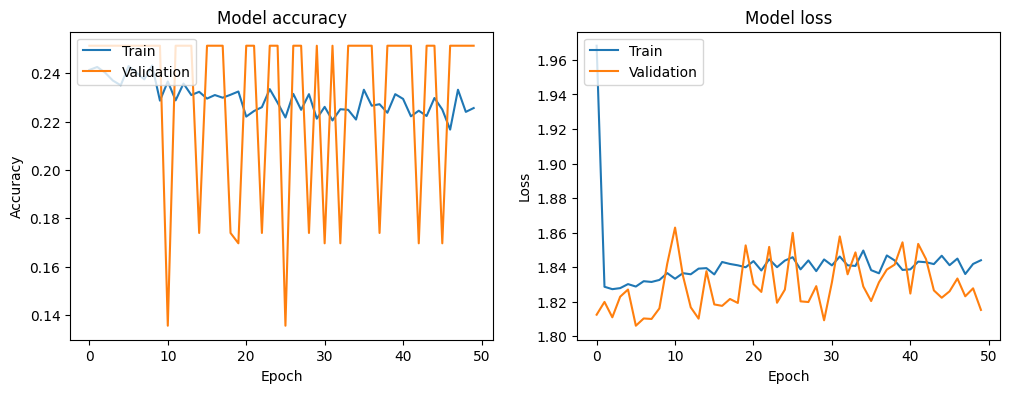

In [9]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_lr_10-2.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 7s 25ms/step - loss: 1.8120 - accuracy: 0.2498 - val_loss: 1.8038 - val_accuracy: 0.2529
Epoch 2/50
256/256 [==============================] - 6s 24ms/step - loss: 1.7705 - accuracy: 0.2737 - val_loss: 1.7527 - val_accuracy: 0.2719
Epoch 3/50
256/256 [==============================] - 6s 25ms/step - loss: 1.7358 - accuracy: 0.2874 - val_loss: 1.7326 - val_accuracy: 0.2848
Epoch 4/50
256/256 [==============================] - 6s 24ms/step - loss: 1.7007 - accuracy: 0.3196 - val_loss: 1.6940 - val_accuracy: 0.3182
Epoch 5/50
256/256 [==============================] - 6s 24ms/step - loss: 1.6566 - accuracy: 0.3411 - val_loss: 1.6589 - val_accuracy: 0.3387
Epoch 6/50
256/256 [==============================] - 6s 25ms/step - loss: 1.6169 - accuracy: 0.3569 - val_loss: 1.6493 - val_accuracy: 0.3494
Epoch 7/50
256/256 [==============================] - 6s 24ms/step - loss: 1.5906 - accuracy: 0.377

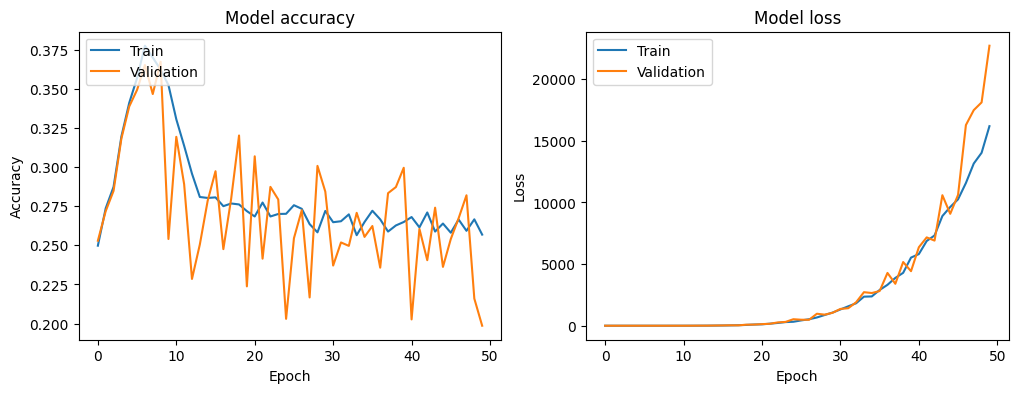

In [10]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_lr_10-3.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 7s 25ms/step - loss: 1.8248 - accuracy: 0.2517 - val_loss: 1.8025 - val_accuracy: 0.2635
Epoch 2/50
256/256 [==============================] - 6s 25ms/step - loss: 1.7854 - accuracy: 0.2633 - val_loss: 1.7615 - val_accuracy: 0.2717
Epoch 3/50
256/256 [==============================] - 6s 24ms/step - loss: 1.7437 - accuracy: 0.2957 - val_loss: 1.7226 - val_accuracy: 0.3080
Epoch 4/50
256/256 [==============================] - 6s 25ms/step - loss: 1.7132 - accuracy: 0.3131 - val_loss: 1.7033 - val_accuracy: 0.3000
Epoch 5/50
256/256 [==============================] - 6s 24ms/step - loss: 1.6834 - accuracy: 0.3333 - val_loss: 1.6812 - val_accuracy: 0.3209
Epoch 6/50
256/256 [==============================] - 6s 25ms/step - loss: 1.6532 - accuracy: 0.3492 - val_loss: 1.6486 - val_accuracy: 0.3480
Epoch 7/50
256/256 [==============================] - 6s 25ms/step - loss: 1.6254 - accuracy: 0.366

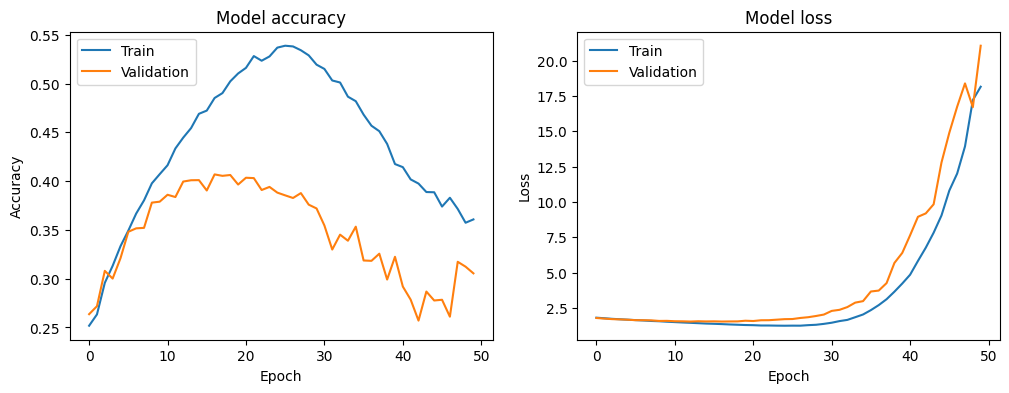

In [11]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_lr_10-4.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 7s 25ms/step - loss: 1.8564 - accuracy: 0.2402 - val_loss: 1.8212 - val_accuracy: 0.2498
Epoch 2/50
256/256 [==============================] - 6s 25ms/step - loss: 1.8189 - accuracy: 0.2496 - val_loss: 1.8174 - val_accuracy: 0.2498
Epoch 3/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8174 - accuracy: 0.2495 - val_loss: 1.8143 - val_accuracy: 0.2499
Epoch 4/50
256/256 [==============================] - 6s 25ms/step - loss: 1.8130 - accuracy: 0.2495 - val_loss: 1.8106 - val_accuracy: 0.2499
Epoch 5/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8088 - accuracy: 0.2502 - val_loss: 1.8064 - val_accuracy: 0.2502
Epoch 6/50
256/256 [==============================] - 6s 24ms/step - loss: 1.8042 - accuracy: 0.2506 - val_loss: 1.8028 - val_accuracy: 0.2501
Epoch 7/50
256/256 [==============================] - 6s 24ms/step - loss: 1.7981 - accuracy: 0.253

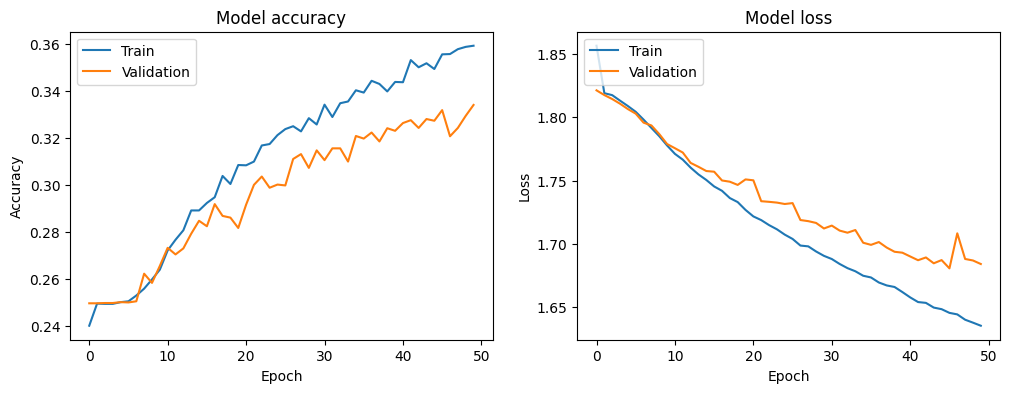

In [12]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_lr_10-5.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/100
256/256 [==============================] - 7s 26ms/step - loss: 1.8527 - accuracy: 0.2415 - val_loss: 1.8158 - val_accuracy: 0.2511
Epoch 2/100
256/256 [==============================] - 6s 25ms/step - loss: 1.8200 - accuracy: 0.2467 - val_loss: 1.8109 - val_accuracy: 0.2511
Epoch 3/100
256/256 [==============================] - 6s 24ms/step - loss: 1.8162 - accuracy: 0.2469 - val_loss: 1.8068 - val_accuracy: 0.2512
Epoch 4/100
256/256 [==============================] - 6s 24ms/step - loss: 1.8133 - accuracy: 0.2478 - val_loss: 1.8023 - val_accuracy: 0.2515
Epoch 5/100
256/256 [==============================] - 6s 24ms/step - loss: 1.8073 - accuracy: 0.2496 - val_loss: 1.7992 - val_accuracy: 0.2515
Epoch 6/100
256/256 [==============================] - 6s 25ms/step - loss: 1.8023 - accuracy: 0.2523 - val_loss: 1.7939 - val_accuracy: 0.2509
Epoch 7/100
256/256 [==============================] - 6s 24ms/step - loss: 1.7960 - accuracy

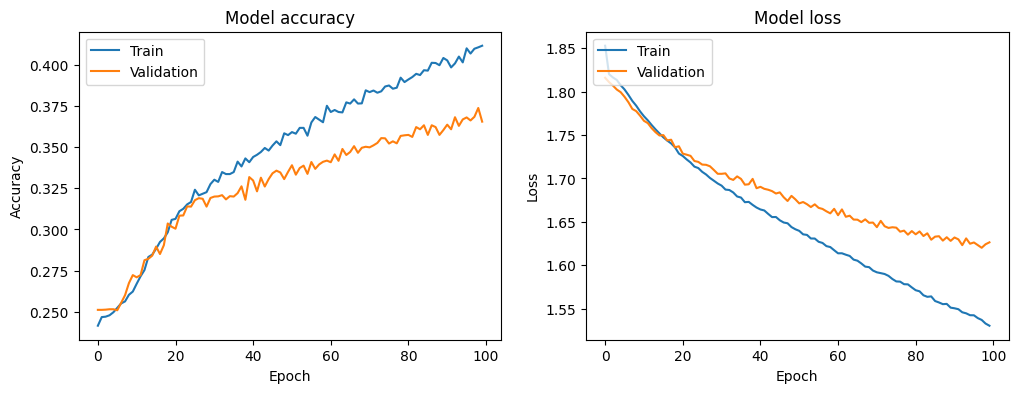

In [13]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 100

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_lr_10-5_epoch100.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/200
256/256 [==============================] - 7s 25ms/step - loss: 1.8592 - accuracy: 0.2340 - val_loss: 1.8215 - val_accuracy: 0.2513
Epoch 2/200
256/256 [==============================] - 6s 24ms/step - loss: 1.8236 - accuracy: 0.2477 - val_loss: 1.8168 - val_accuracy: 0.2513
Epoch 3/200
256/256 [==============================] - 6s 25ms/step - loss: 1.8197 - accuracy: 0.2476 - val_loss: 1.8135 - val_accuracy: 0.2513
Epoch 4/200
256/256 [==============================] - 6s 25ms/step - loss: 1.8170 - accuracy: 0.2478 - val_loss: 1.8124 - val_accuracy: 0.2516
Epoch 5/200
256/256 [==============================] - 6s 24ms/step - loss: 1.8137 - accuracy: 0.2485 - val_loss: 1.8081 - val_accuracy: 0.2520
Epoch 6/200
256/256 [==============================] - 6s 24ms/step - loss: 1.8086 - accuracy: 0.2474 - val_loss: 1.8048 - val_accuracy: 0.2516
Epoch 7/200
256/256 [==============================] - 6s 25ms/step - loss: 1.8030 - accuracy

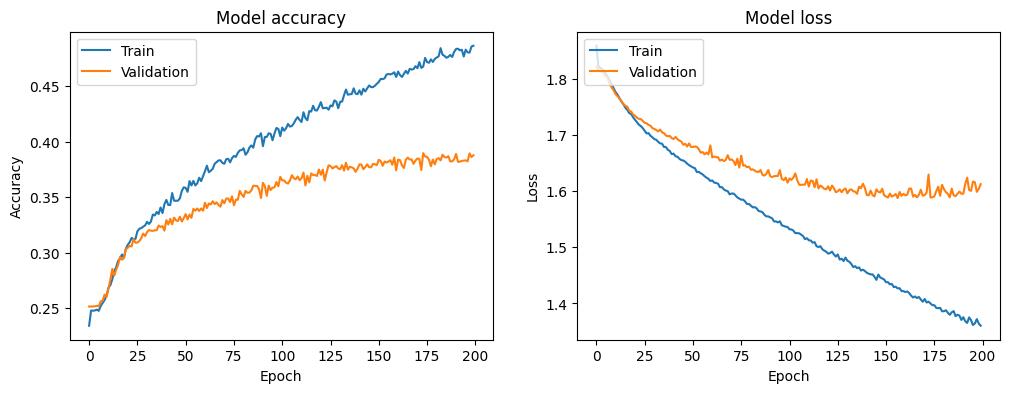

In [14]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 200

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_lr_10-5_epoch200.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/100
256/256 [==============================] - 7s 26ms/step - loss: 1.9449 - accuracy: 0.1429 - val_loss: 1.9223 - val_accuracy: 0.2577
Epoch 2/100
256/256 [==============================] - 7s 28ms/step - loss: 1.9100 - accuracy: 0.2361 - val_loss: 1.8901 - val_accuracy: 0.2567
Epoch 3/100
256/256 [==============================] - 6s 25ms/step - loss: 1.8812 - accuracy: 0.2463 - val_loss: 1.8644 - val_accuracy: 0.2567
Epoch 4/100
256/256 [==============================] - 7s 26ms/step - loss: 1.8612 - accuracy: 0.2463 - val_loss: 1.8473 - val_accuracy: 0.2567
Epoch 5/100
256/256 [==============================] - 6s 25ms/step - loss: 1.8472 - accuracy: 0.2463 - val_loss: 1.8365 - val_accuracy: 0.2567
Epoch 6/100
256/256 [==============================] - 6s 25ms/step - loss: 1.8398 - accuracy: 0.2463 - val_loss: 1.8298 - val_accuracy: 0.2567
Epoch 7/100
256/256 [==============================] - 6s 24ms/step - loss: 1.8344 - accuracy

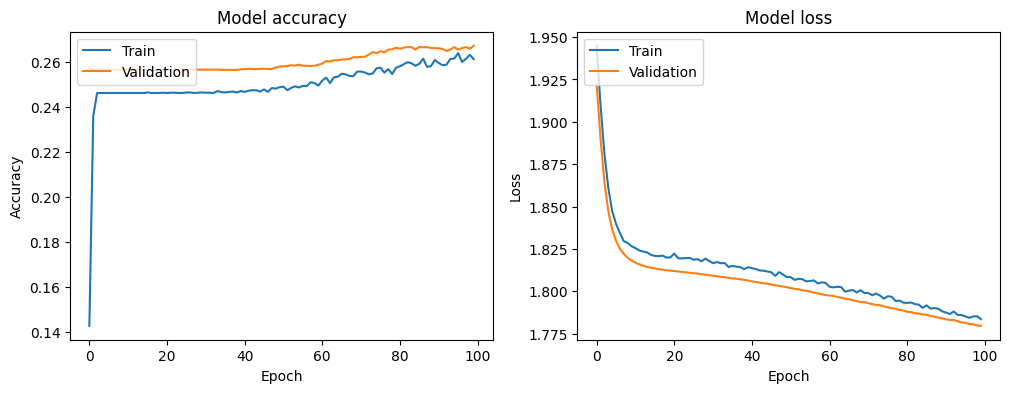

In [15]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 100

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_lr_10-6_epoch100.keras')